# A simple example for logistic regression
This notebook calculates a logistic regression using TensorFlow. It's basically meant to show the principles of TensorFlow.

## Datset

We investigate the data set of the challenger flight with broken O-rings (Y=1) vs start temperature.

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Text(0,0.5,'Broken O-rings')

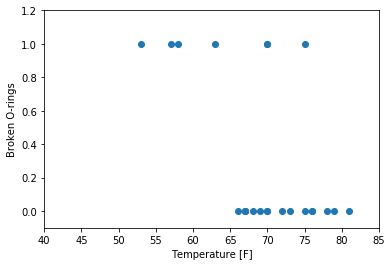

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
import tempfile
data = np.asarray(pd.read_csv('../data/challenger.txt', sep=','), dtype='float32')
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
plt.xlabel('Temperature [F]')
plt.ylabel('Broken O-rings')

In [2]:
y_values = data[:,1]

## Mathematical Notes
We are considering the likelihood $p(y_i=1|x_i)$ for the class $y_i=1$ given the $i-$th data point $x_i$ ($x_i$ could be a vector). This is given by:
$
p(y_i=1 | x_i) = \frac{e^{(b +  x_i W)}}{1 + e^{(b + x_i W)}} = [1 + e^{-(b + x_i W)}]^{-1}
$

If we have more than one data point, which we usually do, we have to apply the equation above to each of the N data points. In this case we can used a vectorized version with $x=(x_1,x_2,\ldots,x_N)$ and $y=(y_1,y_2,\ldots,y_N$)

### Numpy code
This numpy code, shows the calculation for one value using numpy (like a single forward pass)

In [3]:
# Data
N = len(data)
x = data[:,0]
y = data[:,1]
# Initial Value for the weights
w = -0.20
b = 20.0
# Log-Likelihood 
p_1 = 1 / (1 + np.exp(-x*w - b))
like = y * np.log(p_1) + (1-y) * np.log(1-p_1)
print(-np.mean(like))
print(np.round(p_1,3))

3.882916
[0.999 0.998 0.998 0.998 0.999 0.996 0.996 0.998 1.    0.999 0.998 0.988
 0.999 1.    0.999 0.993 0.998 0.978 0.992 0.985 0.993 0.992 1.   ]


## Better values from intuition

Now lets try to find better values for $W$ and $b$. Lets assume $W$ is given with $-1$. We want the probability
for a damage $p(y_i=1 | x_i)$ to be $0.5$.
Determine an appropriate value for $b$.
Hint: at which $x$ value should $p(y_i=1 | x_i)$ be $0.5$, look at the data. At this $x$ value the term $1 + e^{-(b + x_i W)}$ must be $2$.

In [4]:
w_val = -1
b_val = #### write your b value here
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = 1 / (1 + np.exp(-x_pred*w_val - b_val))
plt.plot(x_pred, y_pred)

p_1 = 1 / (1 + np.exp(-x*w_val - b_val))
like = y * np.log(p_1) + (1-y) * np.log(1-p_1)
print(-np.mean(like))
print(np.round(p_1,3))

SyntaxError: invalid syntax (<ipython-input-4-f78d7adc248d>, line 2)

### Tensorflow Code (forward pass)

In [ ]:
import tensorflow as tf
tf.reset_default_graph() #Just to be sure to start with an empty graph

x = tf.placeholder('float32', [N], name='x_data')
y = tf.placeholder('float32', [N], name='y_data')
# Initial weights with initial values
w = tf.Variable(-1.0, name = 'w') 
b = tf.Variable(65.0, name = 'b')

init_op = tf.global_variables_initializer() 
p_1 = 1 / (1 + tf.exp(-x*w - b))
like = y * tf.log(p_1) + (1-y) * tf.log(1-p_1)
loss = -tf.reduce_mean(like) #<----- All up to now is a symbolic definition of a graph
with tf.Session() as sess:
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    loss_, p_1_val = sess.run(fetches = (loss, p_1), feed_dict={x:data[:,0], y:data[:,1]})
    print(loss_)
    print(p_1_val)

### Better values with gradient descent


In [ ]:
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
#train_op = tf.train.AdagradOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(1000):
         = sess.run(fetches=(), feed_dict={x:data[:,0], y:data[:,1]})#fetch your data here
         if (i % 100 == 0):
            print("i={} loss={}".format(i,loss_))

### Storing of the graph

In [ ]:
with tf.Session() as sess:
    sess.run(init_op)
    writer = tf.summary.FileWriter("tmp/Challenger", sess.graph) #<--- Where to store

### Performance can be visualized in Tensorboard

The performance can be visualized in Tensorboard. 
```
    tensorboard --logdir tmp/Challenger 
```
and open a browser at
http://localhost:6006